In [1]:
from edc import check_compatibility
check_compatibility("user-0.24.5", dependencies=["SH"])



---------

The following environment variables are available:

* `SH_CLIENT_SECRET`, `SH_CLIENT_NAME`, `SH_INSTANCE_ID`, `SH_CLIENT_ID`


In [2]:
!pip install folium

# Biomass dataset

## Introduction

Forest Observation System [FOS](https://forest-observation-system.net) is an international cooperation aiming to establish an in-situ forest biomass database in order to support Earth Observation with reliable, up to date, representative and comparable data for validation (Schepaschenko, D. et al. 2019).

## Content & Description

The Biomass dataset is an excel (.xlsx) package containing above-ground biomass estimation of above 260 forest plots divided in 1645 entries and scattered around the world. Majority of the plots have a size of 50x50 m. The storage of coordinates within the excel file makes possible to easily convert the information to GIS formats.

### Description of the dataset:

The dataset has the following content on it:

In [3]:
#import pandas and geopandas, folium and branca
import branca.colormap as cm
import folium
import pandas as pd
pd.set_option('display.max_rows', None)
import geopandas as gp
path = ('https://forest-observation-system.net/Data/FOS_Plots_v2019.04.10.xlsx')
df = pd.read_excel (path)
df.keys()


<ipython-input-3-4955d7a53d3a>:8: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  df = pd.read_excel (path)


Index(['Plot_ID', 'Sub-plot_ID', 'CountryName', 'Network', 'Institution',
       'Link', 'YearEstablished', 'YearCensus', 'PI team', 'Lat_cnt',
       'Lon_cnt', 'Altitude', 'Slope, degree', 'PlotArea', 'Plot_shape',
       'Forest_Status', 'MinDBH', 'H_Lorey_local', 'H_Lorey_Chave',
       'H_Lorey_Feldpausch', 'H_max_Local', 'H_max_Chave', 'H_max_Feldpausch',
       'AGB_local', 'AGB_local_Cred_2.5', 'AGB_local_97.5', 'AGB_Feldpausch',
       'AGB_Feldpausch_Cred_2.5', 'AGB_Feldpausch_Cred_97.5', 'AGB_Chave',
       'AGB_ChaveCred_2.5', 'AGB_ChaveCred_97.5', 'Wood density', 'GSV', 'BA',
       'Ndens', 'Reference', 'Other_Measurements',
       'Biomass processing protocol'],
      dtype='object')

#### Plot_ID

Plot_ID stores area of interest (AOI) unique identifier code. For each AOI, there are more infomration linked (Sub-plot_ID). 
By analysing the Polt_ID field, it can be extracted either the name of plots stored in the dataset as well as the number of entries per plot.

In [4]:
df['Plot_ID'].value_counts()

BCI-01                       200
Rabi                         100
PAR-16                       100
RM-01                         65
NOU-04                        48
NOU-02                        40
PAR-15                        25
PAR-12                        25
PAR-08                        25
PAR-03                        25
PAR-02                        25
PAR-07                        25
PAR-17                        25
PAR-01                        25
PAR-13                        25
PAR-05                        25
PAR-11                        25
PAR-14                        25
PAR-09                        25
PAR-06                        25
PAR-04                        25
PAR-10                        25
NOU-03                        24
RK_Tychany                     9
NOU-01                         8
BDEF-RY-Rav                    5
MON-14                         4
LFB-01                         4
TAM-07                         4
BDEF-RQ-Rid                    4
POA-01    

#### PlotArea

It is mentioned in the dataset specifications that each plot has 50 x 50 m size. This information is stored in the dataset as well. Even though majority of the plots have 50 x 50m seize, there are also other sizes within the dataset. The total amount of different plot sizes and frequency appearing in the dataset are:

In [5]:
print("--------------------")
print(" Area  ", "  Number of entries  ")
df['PlotArea'].value_counts()

--------------------
 Area     Number of entries  


0.2500    1588
0.5000      15
0.0625       9
0.2400       7
1.0000       5
0.2000       2
0.3000       2
0.3200       1
0.3670       1
2.8900       1
0.8800       1
1.5600       1
0.4270       1
2.1500       1
0.2930       1
0.7500       1
1.2000       1
0.3640       1
0.4100       1
0.4400       1
0.2880       1
0.5500       1
2.1300       1
0.2600       1
Name: PlotArea, dtype: int64

#### Network

The dataset is a cooperation between several actors around the world, the list of projects feeding the dataset is also stored in the dataset and those are:

In [6]:
print("Main actors contributing to the dataset:\n ",df.Network.unique())


Main actors contributing to the dataset:
  ['RAINFOR' 'AfriTRON' 'AusCover' 'ForestGEO' 'IIASA' 'TForces' nan 'TmFO']


Each of this providers are focused on an specific area of interest as described in the table below:

| Network      | Description | Site |
| ----------- | ----------- | ----------- |
| RAINFOR      | Amazon Forest Inventory Network is a long-term, international collaboration to understand the dynamics of Amazon ecosystems      |  http://www.rainfor.org |
| AfriTRON  | The African Tropical Rainforest Observation Network (AfriTRON), is an international network of researchers engaged in on-the-ground long-term monitoring of tropical forests.        | http://www.afritron.org |
| AusCover | TERN AusCover delivers earth observation data and products that describe important land-surface and environmental characteristics derived using satellite and airborne imagery. | http://www.auscover.org.au/ |
| ForestGEO | Forest Global Earth Observatory (ForestGEO), previously known as Center for Tropical Forest Science (CTFS), is a global network of forest research sites and scientists dedicated to the study of tropical and temperate forest function and diversity | https://forestgeo.si.edu |
| IIASA |  | https://www.univie.ac.at/bdef/php/ |
| TForces | 5-yr interdisciplinary research project aims to construct a Pan-Tropical Observatory of Forest Function, to explore forest response to global change. | http://www.tforces.net |
| TmFO | Large scale forest disturbance in Amazonia | https://paracou.cirad.fr |

Likewise, the organisations behind the above mentioned actors (and also contained in the dataset) are:

In [7]:
print("Main organisations behind providers:\n ",df.Institution.unique())

Main organisations behind providers:
  ['Uni Leeds' 'International collaboration' nan 'CTFS' 'Uni Wien'
 'CzechGlobe' 'IBL' 'NASA' 'CNRS' 'CNRS, ONF' 'CIRAD' 'CEPF RAS'
 'IF.SB.RAS' 'IIASA' 'IB.KomiSC' 'MB BMSTU' 'Zapovednik Denezhkin Kamen'
 'Silvanet, Universidad Politécnica Madrid' 'NULESU']


#### Forest Status

Within the forest status field, it has been classified the following classes:
As seen above, there are a lot of classes. By measuring the frequency of each of the classes, it could be asessed which are the most listed in the dataset and it could be identified those which frequency is lower:

In [8]:
df['Forest_Status'].value_counts()


Old-growth lowland moist mixed forest                                                                                                                                                                                                                                                 394
Mature                                                                                                                                                                                                                                                                                 24
Ridge Primary Forest                                                                                                                                                                                                                                                                   20
Slope Primary Forest                                                                                                                                      

#### Exploring the dataset

Within the dataset, there is important data stored, where by analysing the data, gives important information about the dataset.

Regarding the wood density, it could be identified the following values distribution:

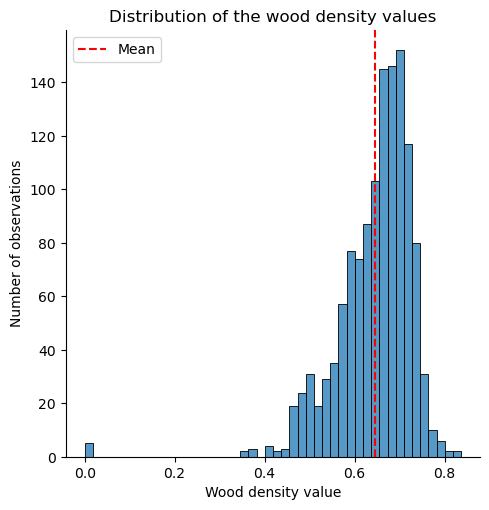

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.displot(df['Wood density'],kde = False)
mean=df['Wood density'].mean()

plt.axvline(mean, color='r', linestyle='--')
plt.legend({'Mean':mean})
plt.title('Distribution of the wood density values')
plt.xlabel('Wood density value')
plt.ylabel('Number of observations')  
plt.show()


By analysing the different values measured of the above ground biomass, it could be compared the distribution of the total measurements by class putting each other

In [10]:
fig, axs = plt.subplots(2, 4,figsize=(18, 10))
sns.distplot(df['AGB_local_97.5'],kde = False,ax=axs[0,0],color='red')
sns.distplot(df['AGB_Feldpausch'],kde = False,ax=axs[0,1],color='yellow')
sns.distplot(df['AGB_Feldpausch_Cred_2.5'],kde = False,ax=axs[0,2],color='orange')
sns.distplot(df['AGB_Feldpausch_Cred_97.5'],kde = False,ax=axs[0,3],color='grey')
sns.distplot(df['AGB_Chave'],kde = False,ax=axs[1,0],color='blue')
sns.distplot(df['AGB_ChaveCred_2.5'],kde = False,ax=axs[1,1],color='black')
sns.distplot(df['AGB_ChaveCred_97.5'],kde = False,ax=axs[1,2],color='brown')
axs[0,0].set_title('AGB local 97.5')
axs[0,1].set_title('AGB Feldpaush')
axs[0,2].set_title('AGB Feldpaush 2.5')
axs[0,3].set_title('AGB Feldpaush 97.5')
axs[1,0].set_title('AGB Chave')
axs[1,1].set_title('AGB Chave 2.5')
axs[1,2].set_title('AGB Chave 97.5')



/opt/conda/envs/eurodatacube-gpu-0.24.5/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'AGB Chave 97.5')

Within the dataset, it is also stored a timeline showing the established year and the census year for each of the entries on it. The plot below aims to represent the distribution of this collected information throughout all the timeline stored in the databse.

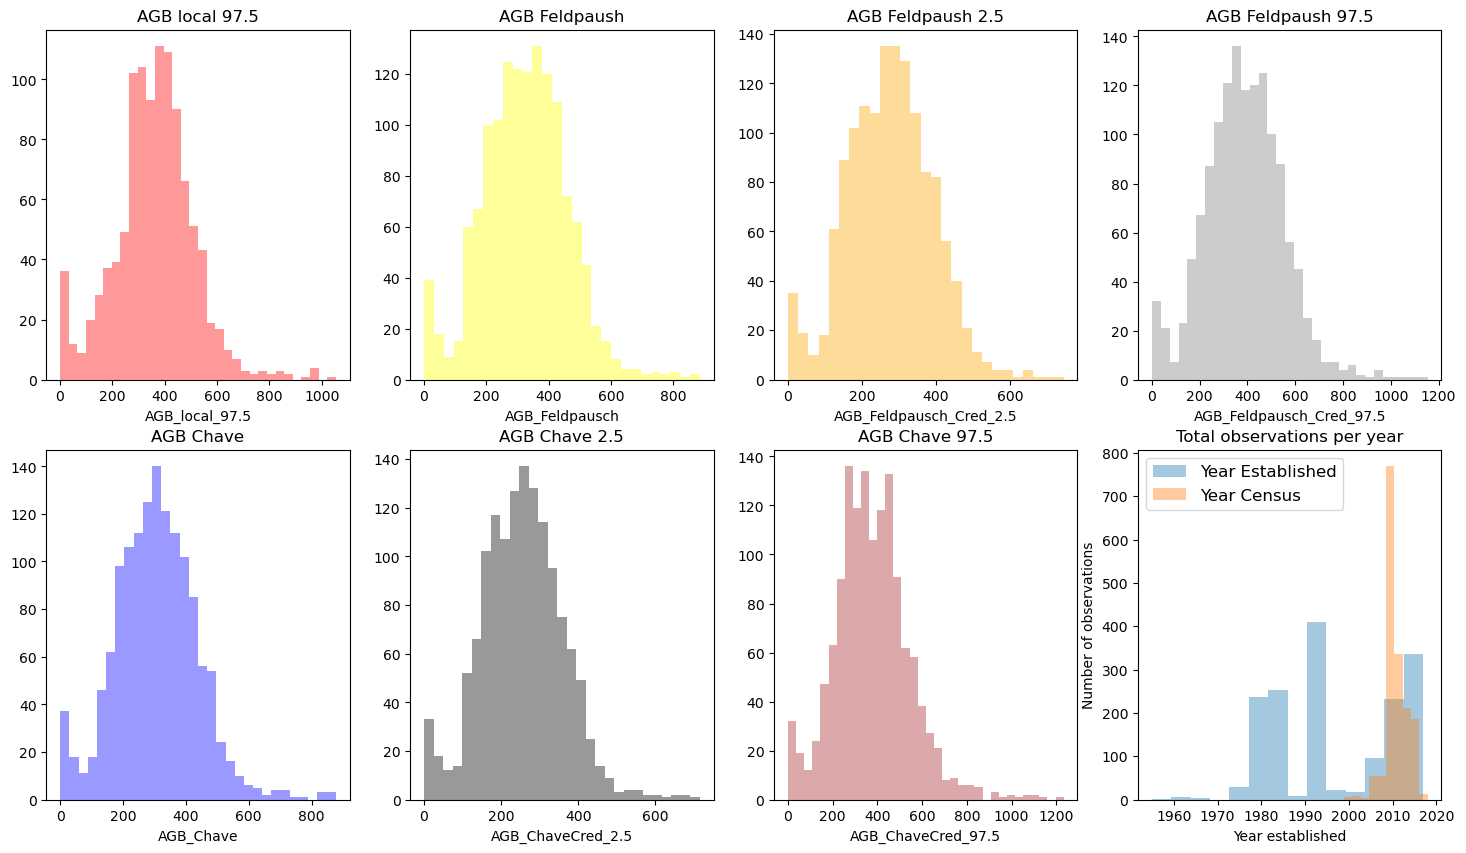

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.distplot(df['YearEstablished'],kde = False,label='Year Established')
sns.distplot(df['YearCensus'],kde = False, label='Year Census', bins=10)
plt.legend(prop={'size': 12})
plt.title('Total observations per year')
plt.xlabel('Year established')
plt.ylabel('Number of observations')  
plt.show()


To geolocate the plots, it is quite useful the combination of [Pandas](https://pandas.pydata.org) and [Geopandas](https://geopandas.org) with [Folium](https://python-visualization.github.io/folium/), it's possible to display the whole dataset in an interactive map.

In [12]:

print('List of countries included in the dataset:\n ',df.CountryName.unique())

List of countries included in the dataset:
  ['Brazil' 'Peru' 'Bolivia' 'Ghana' 'Australia' 'Panama' 'Costa Rica'
 'Liberia' 'Czech Republic' 'Malaysia' 'Cameroon' 'Guyana' 'Poland'
 'Congo, Democratic republic' 'Gabon' 'French Guiana' 'Russia' 'Spain'
 'Ukraine']


[Folium](https://python-visualization.github.io/folium/) is a python library to produce interactive maps. Below an example on ploting dataset points using Folium opiton to use leaflet map as a background, with information regarding the forest status within the pop up

In [13]:

map = folium.Map(tiles='cartodbpositron')
map.save(outfile='infinite_scroll.html')
map_fix_boundary = folium.Map(min_zoom=10, max_bounds=True, tiles='cartodbpositron')
map_fix_boundary.save(outfile='fix_boundary.html')
map

plots = folium.map.FeatureGroup()
latitudes = list(df.Lat_cnt)
longitudes = list(df.Lon_cnt)
labels = list(df.Forest_Status)
for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker(
      location = [lat, lng], 
      popup = label,
      icon = folium.Icon(color='green', icon='info-sign')
     ).add_to(map) 
map.add_child(plots)
map


The providers have used 4 different data processing protocols to get the biomass. 

| Protocol      |  Information about protocol |
| ----------- |  ----------- |
| RepFOS_15Feb19_TropiSAR      |  https://forest-observation-system.net/Data/RepFOS_15Feb19_TropiSAR.pdf |
| RepFOS_14Feb17_ForestPlots     | https://forest-observation-system.net/Data/RepFOS_14Feb17_ForestPlots.pdf |
| RepFOS_14Feb17_BCI_ForestGEO  |  https://forest-observation-system.net/Data/RepFOS_14Feb17_BCI_ForestGEO.pdf |
| RepFOS_15Feb19_AfriSAR     | https://forest-observation-system.net/Data/RepFOS_15Feb19_AfriSAR.xlsx|

Each of the protocols has been use several times, as listed below

In [14]:
df['Biomass processing protocol'].value_counts()

RepFOS_15Feb19_TropiSAR.pdf         633
RepFOS_14Feb17_ForestPlots.pdf      387
RepFOS_14Feb17_BCI_ForestGEO.pdf    200
RepFOS_15Feb19_AfriSAR.pdf          160
Name: Biomass processing protocol, dtype: int64

#### Information per entry

An important aspect to know is the information associated per entry. Below there si a list of the five first entries of the dataset and the information associated to each of those.

In [15]:
df.iloc[0:5] # first five rows of dataframe

,Plot_ID,Sub-plot_ID,CountryName,Network,Institution,Link,YearEstablished,YearCensus,PI team,Lat_cnt,...,AGB_Chave,AGB_ChaveCred_2.5,AGB_ChaveCred_97.5,Wood density,GSV,BA,Ndens,Reference,Other_Measurements,Biomass processing protocol
0,ALF-01,0_0,Brazil,RAINFOR,Uni Leeds,http://www.rainfor.org,2002,2008,Beatriz Marimon (Universidade do Estado de Mat...,-9.60,...,370.4,307.1,469.3,0.638,NaN,NaN,NaN,"Phillips O. L., Aragão L. E. O. C. , Lewis S. ...",NaN,RepFOS_14Feb17_ForestPlots.pdf
1,ALF-01,0_1,Brazil,RAINFOR,Uni Leeds,http://www.rainfor.org,2002,2008,Beatriz Marimon (Universidade do Estado de Mat...,-9.60,...,163.6,130.5,217.3,0.612,NaN,NaN,NaN,"Phillips O. L., Aragão L. E. O. C. , Lewis S. ...",NaN,RepFOS_14Feb17_ForestPlots.pdf
2,ALF-01,0_2,Brazil,RAINFOR,Uni Leeds,http://www.rainfor.org,2002,2008,Beatriz Marimon (Universidade do Estado de Mat...,-9.60,...,220.4,188.1,257.8,0.646,NaN,NaN,NaN,"Phillips O. L., Aragão L. E. O. C. , Lewis S. ...",NaN,RepFOS_14Feb17_ForestPlots.pdf
3,ALF-01,0_3,Brazil,RAINFOR,Uni Leeds,http://www.rainfor.org,2002,2008,Beatriz Marimon (Universidade do Estado de Mat...,-9.59,...,179.6,155.0,209.2,0.645,NaN,NaN,NaN,"Phillips O. L., Aragão L. E. O. C. , Lewis S. ...",NaN,RepFOS_14Feb17_ForestPlots.pdf
4,ALP-01,0_0,Peru,RAINFOR,Uni Leeds,http://www.rainfor.org,1990,2005,Rodolfo Vasquez Martinez (Jardín Botánico de M...,-3.95,...,260.8,218.3,315.4,0.598,NaN,NaN,NaN,"Phillips O. L., Aragão L. E. O. C. , Lewis S. ...",NaN,RepFOS_14Feb17_ForestPlots.pdf


### Exploring EO-Learn functionality

[eo-learn](https://eo-learn.readthedocs.io/en/latest/) is an opensource Python library acting as a bridge between Earth Observation and Python's data science and machine learning environment. Eo-learn makes extraction of valuable information from satellite imagery as easy as defining a sequence of operations to be performed on satellite imagery.

This section describes the way to pull information from [Sentinel-hub](https://www.sentinel-hub.com) by using eo-learn. In this example we have used io_examples from [eo-learn library](https://eo-learn.readthedocs.io/en/latest/examples/io/SentinelHubIO.html) and adapt it to this project

For more information about the possibilities to interact, please see [eo-learn Github](https://github.com/sentinel-hub/eo-learn/blob/master/README.md). Below follows an example on how to pull S-2 image based on Biomass dataset variables.

In [16]:
from edc import print_info
print_info("sh-data-access")


***Notebook Title***  
Sentinel Hub data access using xcube

***Notebook Description***  
Euro Data Cube Sentinel Hub - data access


***Notebook Dependencies***  
This notebook requires an active subscription to:
* EDC Sentinel Hub


In [17]:
from edc import setup_environment_variables

#setup_environment_variables()
# Your client credentials
CLIENT_ID = %env SH_CLIENT_ID
CLIENT_SECRET = %env SH_CLIENT_SECRET
INSTANCE_ID = %env SH_INSTANCE_ID



In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
from aenum import MultiValueEnum
from matplotlib.colors import ListedColormap, BoundaryNorm

from edc import setup_environment_variables
from xcube_geodb.core.geodb import GeoDBClient
# Sentinel Hub Py
from sentinelhub import (SHConfig, BBox, bbox_to_dimensions, CRS,SentinelHubBatch, SentinelHubRequest, DataCollection, MimeType, FisRequest)
from sentinelhub.geometry import Geometry

from eolearn.core import EOTask, EOPatch, LinearWorkflow, FeatureType, OverwritePermission, \
    LoadTask, SaveTask, EOExecutor, ExtractBandsTask, MergeFeatureTask
from eolearn.io.sentinelhub_process import SentinelHubInputTask, SentinelHubDemTask, SentinelHubInputBase, get_available_timestamps
from eolearn.features import LinearInterpolation, SimpleFilterTask, NormalizedDifferenceIndexTask
from eolearn.io import ExportToTiff

from eolearn.mask import AddValidDataMaskTask

In [23]:
config = SHConfig()

if CLIENT_ID and CLIENT_SECRET and INSTANCE_ID:
    config.instance_id = INSTANCE_ID
    config.sh_client_id = CLIENT_ID
    config.sh_client_secret = CLIENT_SECRET

if config.sh_client_id == '' or config.sh_client_secret == '' or config.instance_id == '':
    print("Warning! missing Sentinel Hub credentials (client ID and client secret).")

/opt/conda/envs/eurodatacube-gpu-0.24.5/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Next stage is to define AOI and tiem interval. That is the part it can be used information picked from biomass dataset to fill those blanks.In this case, coordinates are picked from dataset to be included in the process.

In [24]:
## let's choose the data from 5th row of the dataset
lon = df['Lon_cnt'][1]
lat = df['Lat_cnt'][1]
LON = round(lon+0.05,2)
LAT = round(lat+0.05,1)
roi_bbox = BBox(bbox=[ lon,lat,LON, LAT], crs=CRS.WGS84) # since the input requirement is a bbox, we just add 0.001 to the lat lon provided
#print(roi_bbox)

Set the rest of the variables

In [25]:
# time interval of downloaded data
START= datetime.date(2018, 3, 1)
END = datetime.date(2018, 12, 1)
INTERVAL =15


# time interval of downloaded data
time_interval = (START, END)

# maximal cloud coverage (based on Sentinel-2 provided tile metadata)
maxcc = .5

# resolution of the request (in metres)
resolution = 10

# time difference parameter (minimum allowed time difference; if two observations are closer than this, they will be mosaicked into one observation)
time_difference = datetime.timedelta(hours=2)

Set the input task we want

In [26]:
input_task = SentinelHubInputTask(
    data_collection=DataCollection.SENTINEL2_L1C,
    bands=['B01','B02','B03','B04','B05','B06','B07','B08','B8A','B09','B10','B11','B12'],
    bands_feature=(FeatureType.DATA, 'L1C_data'),
    additional_data=[(FeatureType.MASK, 'dataMask')],
    resolution=resolution,
    maxcc=maxcc,
    time_difference=time_difference,
    config=config,
    max_threads=3
)

In [27]:
add_l2a_and_scl = SentinelHubInputTask(
    data_collection=DataCollection.SENTINEL2_L2A,
    bands=['B01','B02','B03','B04','B05','B06','B07','B08','B8A','B09','B11','B12'],
    bands_feature=(FeatureType.DATA, 'L2A_data'),
    additional_data=[(FeatureType.MASK, 'SCL')],
    resolution=resolution,
    maxcc=maxcc,
    time_difference=time_difference,
    config=config,
    max_threads=3
)

In [28]:
save = SaveTask('io_example', overwrite_permission=2, compress_level=1)

Set the workflow and execute it

/opt/conda/envs/eurodatacube-gpu-0.24.5/lib/python3.8/site-packages/pydap/model.py:175: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import OrderedDict, Mapping
/opt/conda/envs/eurodatacube-gpu-0.24.5/lib/python3.8/site-packages/pydap/responses/das.py:14: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


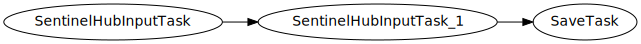

In [29]:
workflow = LinearWorkflow(input_task, add_l2a_and_scl, save)
# Let's visualize it
workflow.dependency_graph()


In [30]:
result = workflow.execute({
    input_task: {'bbox': roi_bbox, 'time_interval': time_interval},
    save: {'eopatch_folder': 'eopatch'}
})


/opt/conda/envs/eurodatacube-gpu-0.24.5/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CustomOAuth2Error: (During execution of task SentinelHubInputTask: ({'status': 400, 'reason': 'Bad Request', 'message': 'Illegal client_id', 'code': 'OAUTH_ERROR'}) ) 

In [ ]:
eopatch = result.eopatch()
eopatch

In [ ]:

f, axarr = plt.subplots(3,3,figsize = (20,20))

axarr[0,0].imshow(np.clip(eopatch.data['L1C_data'][5][..., [3,2,1]] * 2.5, 0, 1))
axarr[0,0].set_title("5th image in eo_patch, RGB image")
axarr[0,0].axis('off')
axarr[0,1].imshow(np.clip(eopatch.data['L1C_data'][10][..., [3,2,1]] * 2.5, 0, 1))
axarr[0,1].set_title("10th image in eo_patch, RGB image")
axarr[0,1].axis('off')
axarr[0,2].imshow(np.clip(eopatch.data['L1C_data'][15][..., [3,2,1]] * 2.5, 0, 1))
axarr[0,2].set_title("15th image in eo_patch, RGB image")
axarr[0,2].axis('off')
axarr[1,0].imshow(np.clip(eopatch.data['L1C_data'][5][..., [8,4,3]] * 2.5, 0, 1))
axarr[1,0].set_title("5th image in eo_patch, False colour image")
axarr[1,0].axis('off')
axarr[1,1].imshow(np.clip(eopatch.data['L1C_data'][10][..., [8,4,3]] * 2.5, 0, 1))
axarr[1,1].set_title("10th image in eo_patch, False colour image")
axarr[1,1].axis('off')
axarr[1,2].imshow(np.clip(eopatch.data['L1C_data'][15][..., [8,4,3]] * 2.5, 0, 1))
axarr[1,2].set_title("15th image in eo_patch, False colour image")
axarr[1,2].axis('off')
axarr[2,0].imshow(np.clip(eopatch.data['L1C_data'][5][..., [12,8,4]] * 2.5, 0, 1))
axarr[2,0].set_title("5th image in eo_patch, SWIR highlighted image")
axarr[2,0].axis('off')
axarr[2,1].imshow(np.clip(eopatch.data['L1C_data'][10][..., [12,8,4]] * 2.5, 0, 1))
axarr[2,1].set_title("10th image in eo_patch, SWIR highlighted image")
axarr[2,1].axis('off')
axarr[2,2].imshow(np.clip(eopatch.data['L1C_data'][15][..., [12,8,4]] * 2.5, 0, 1))
axarr[2,2].set_title("15th image in eo_patch, SWIR highlighted image")
axarr[2,2].axis('off')



#### Loading task from eo_patch already saved

Once a task cached, it is possible to recall it again by the example below skipping all the steps above explained by doing as follows:

In [ ]:
load = LoadTask('io_example')

In [ ]:
new_eopatch = load.execute(eopatch_folder='eopatch')
new_eopatch

## Format

The dataset is in spreadsheet format (.xlsx)

## Version

FOS plot data v2019.04.10

## License

This dataset is licensed under a [Creative Commons Attribution 4.0 International License (CC-BY 4.0).](https://creativecommons.org/licenses/by/4.0/)

## References

Schepaschenko, D., Chave, J., Phillips, O. L., Lewis, S. L., Davies, S. J., Réjou-Méchain, M., ... & Labrière, N. (2019). The Forest Observation System, building a global reference dataset for remote sensing of forest biomass. Scientific data, 6(1), 1-11.